##### Importing the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv('Sales_add.csv')

In [3]:
#setting the max_row display option
pd.options.display.max_rows = 1000

In [4]:
sales

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


##### Descriptive Analytics on the dataset

In [6]:
#No:of rows and columns
sales.shape

(22, 5)

In [7]:
# checking for null values
sales.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [8]:
#Information about the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [9]:
#Calculating stastical data/Description of the data
sales.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [18]:
# Region with respect to Manager
sales.groupby(['Region', 'Manager']).size()

Region      Manager    
Region - A  Manager - A    4
            Manager - B    3
            Manager - C    3
Region - B  Manager - A    4
            Manager - B    1
            Manager - C    2
Region - C  Manager - A    1
            Manager - B    3
            Manager - C    1
dtype: int64

#### The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.


#### H0: No increase in sales after stepping into digital marketing. 
#### H1: Increase in sales after stepping into digital marketing.

In [21]:
#Sales before and after digital marketing based on region and manager
sales[['Region','Manager','Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].groupby(['Region','Manager']).agg(['mean','count']).round(1)

Sales_before_digital_add(in $)        \
                                                 mean count   
Region     Manager                                            
Region - A Manager - A                       148628.5     4   
           Manager - B                       155617.0     3   
           Manager - C                       140228.0     3   
Region - B Manager - A                       142725.0     4   
           Manager - B                       152167.0     1   
           Manager - C                       165299.0     2   
Region - C Manager - A                       147463.0     1   
           Manager - B                       156492.3     3   
           Manager - C                       130625.0     1   

                       Sales_After_digital_add(in $)        
                                                mean count  
Region     Manager                                          
Region - A Manager - A                      257609.2     4  
           Manager - B                      218944.0     3  
           Manager - C                      233754.0     3  
Region - B Manager - A                      234962.8     4  
           Manager - B                      231808.0     1  
           Manager - C                      214718.0     2  
Region - C Manager - A                      229336.0     1  
           Manager - B                      214551.3     3  
           Manager - C                      222106.0     1

In [42]:
sales[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [39]:
from scipy import stats
sales[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].describe()
ttest,pval = stats.ttest_rel(sales['Sales_before_digital_add(in $)'], sales['Sales_After_digital_add(in $)'])
print('Tvalue:',ttest)
print('Pvalue :',pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Tvalue: -12.09070525287017
Pvalue : 6.336667004575778e-11
reject null hypothesis


Test stastics is -12.09070525287017
p-value is  6.336667004575778e-11


##### Since pval<0.05 and reject null hypothesis , we conclude that there is  Increase in sales after stepping into digital marketing.

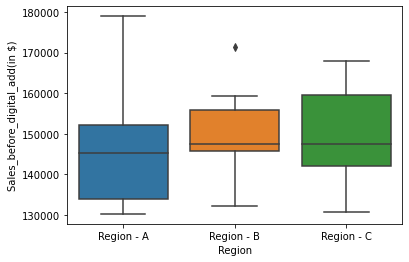

In [19]:
#Boxplot of region with respect to Sales_before_digital_add(in $)
sns.boxplot(x='Region',y='Sales_before_digital_add(in $)',data=sales)
plt.show()

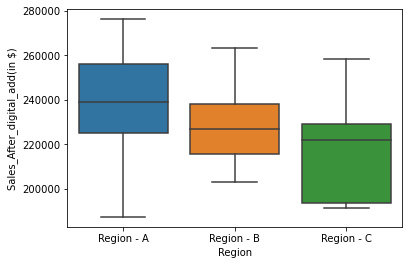

In [20]:
#Boxplot of region with respect toSales_After_digital_add(in $)  
sns.boxplot(x='Region',y='Sales_After_digital_add(in $)',data=sales)
plt.show()

#### The company needs to check whether there is any dependency between the features “Region” and “Manager”.

#### Chi-Squared Test:Tests whether two categorical variables are related or independent.

In [33]:
#In order to compute the Chi-square test statistic, we would need to construct a contingency table.We can do that using the ‘crosstab’ function from pandas:
sales_Table=pd.crosstab(sales.Region, sales.Manager)

In [34]:
sales_Table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [36]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(sales_Table.values)
print('Chi stastics:',chi2)
print ('Pvalue:', p)
if p <= 0.05:
    print('dependent, there is dependency between region and manager')
else:
    print('Independent, there is no dependency between region and manager')

Chi stastics: 3.050566893424036
Pvalue: 0.5493991051158094
Independent, there is no dependency between region and manager


##### Since Pvalue is greater than 0.05 we can conclude that there is no dependency between the features “Region” and “Manager”.

#### SUBMITTED BY: LISA SHAJI(DSA-B3)